# Regressão Linear com Rede Neural


## 1. Importar as bibliotecas necessárias.

A Matplotlib vai nos ajudar a criar gráficos e visualizar o que está acontecendo.

Já o PyTorch é a biblioteca responsável por criar efetivamente a rede neural, e nos poupar de implementar vários algoritmos úteis manualmente.


In [1]:
import torch
from matplotlib import pyplot as plt
from torch import nn


## 2. Gerar os dados de treinamento e teste


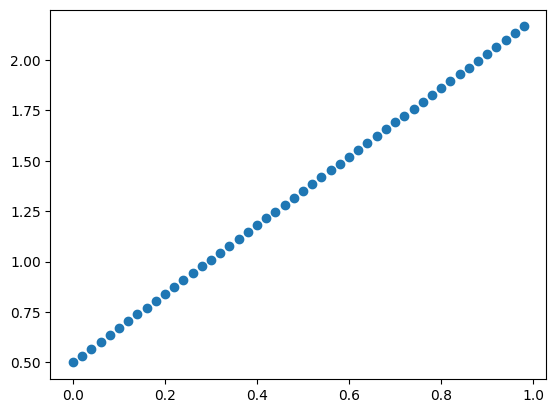

In [2]:
weight = 1.7
bias = 0.5

# Gero valores de 0 a 1 com passo 0.02 para o nosso x.
x = torch.arange(start=0, end=1, step=0.02).unsqueeze(1)

# Calculo y para cada valor de x. Basicamente estou calculando y = a*x + b. Só que chamamos o "a" de weight e b de bias
# Repare que x é um Tensor (Que é basicamente um array que pode ter muitas dimensões) com vários valores de x. O PyTorch nos permite fazer isso.
y = weight * x + bias

# Ploto os dados, para fins didáticos
plt.plot(x, y, "o")
plt.show()


## 3. Criar nossa rede neural

Aqui não se assuste com o código, que é bem especifico do PyTorch. A única coisa que você precisa entender é que estamos criando uma classe _ModeloParaRegressãoLinear_ e definimos nela apenas 1 camada que vai ter apenas 1 neurônio.

O modelo inicia com valores de weight and bias aleatórios. O melhor é que podemos ver quais são esses valores, e testar o nosso modelo como ele está, antes do treinamento.


OrderedDict({'linear_layer.weight': tensor([[0.7645]]), 'linear_layer.bias': tensor([0.8300])})


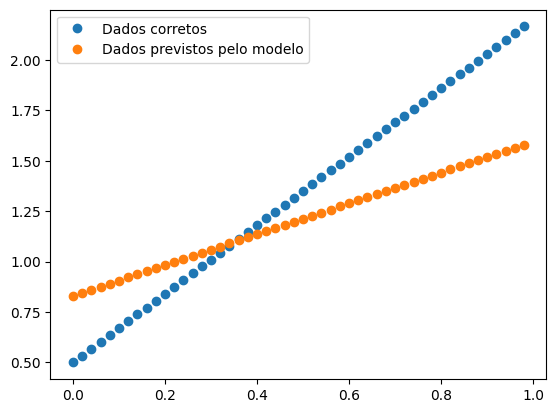

In [3]:
# Fixo uma seed para que os valores aleatórios sejam sempre os mesmos tanto para mim, quanto para você no seu computador.
torch.manual_seed(42)


class ModeloParaRegressãoLinear(nn.Module):
    def __init__(self, in_size: int = 1, out_size: int = 1):
        super().__init__()
        self.linear_layer = nn.Linear(
            in_size, out_size
        )  # Apenas uma camada linear, que vai entrar um valor e sair um valor.

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


model = ModeloParaRegressãoLinear()  # Criando uma instancia do modelo.

# Imprime os parâmetros atuais do modelo. Perceba que estão bem diferentes dos definidos na etapa 2
print(model.state_dict())

with torch.inference_mode():  # Coloca o modelo no modo de inferência
    y_prev = model(x)  # Pega os valores de y previstos pelo modelo.

plt.plot(x, y, "o", label="Dados corretos")
plt.plot(x, y_prev, "o", label="Dados previstos pelo modelo")
plt.legend()
plt.show()


## 4. Treinar nossa rede neural

O PyTorch não dá de bandeja uma função tipo train(), por isso o código abaixo vai parecer mais verboso que o normal. Mas isso é importante para que possamos customizar a etapa do treinamento, o que no futuro vai ser bem útil.

Perceba que estamos treinando o modelo com todos os dados que temos. Isso não é comum, em casos reais nós sempre dividimos os dados entre dados de treinamento e dados de teste. Isso nos ajuda a medir se o modelo está sendo capaz de prever dados que ele nunca viu antes.

É aqui que vamos definir as famosas funções de perda (loss) e de otimização (optimization). Entender como essas funções funcionam é muito importante pois elas tem uma influencia muito alta na capacidade do nosso modelo de aprender. Escolher quais algorítimos usar aqui é crucial.


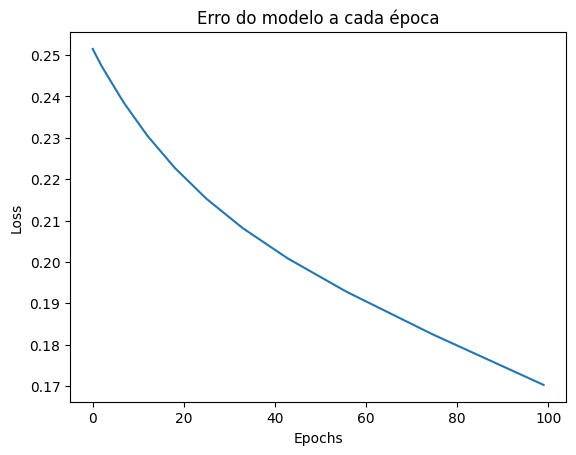

In [4]:
# L1Loss é a função de perda mais simples.
# Conhecida como MAE (mean absolute error), ela simplesmente tira a média dos erros absolutos entre os dados de treinamento e os dados previstos pelo modelo.
# loss ​= média(∣yPrev ​- yTrain​∣)
loss_fn = nn.L1Loss()

# A função de otimização aqui é a SGD (stochastic gradient descent).
# Tudo que ela faz é fazer a descida do gradiente na função de perda de acordo com o passo escolhido (0.0001).
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# N° de épocas que o modelo vai passar pelos dados de treinamento
epochs = 100

# Listas vazias que usaremos para montar o gráfico do loss
loss_values = []
epoch_count = []


# O Loop de treinamento
for epoch in range(epochs):
    # Coloca o modelo no modo de treinamento
    model.train()

    # 1. Calcula os valores de y previstos pelo modelo.
    y_pred = model(x)

    # 2. Calcula o loss usando a nossa função loss.
    loss = loss_fn(y_pred, y)

    # 3. Ajusta os valores do modelo + detalhes de implementação do PyTorch. Não precisa se importar com isso, pelo menos por enquanto.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Guarda os valores de loss após cada época, isso vai nos ajudar a montar gráficos depois.
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())


plt.title("Erro do modelo a cada época")
plt.plot(epoch_count, loss_values)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()


# 5. Testar nossa rede neural


OrderedDict({'linear_layer.weight': tensor([[1.0256]]), 'linear_layer.bias': tensor([0.8584])})


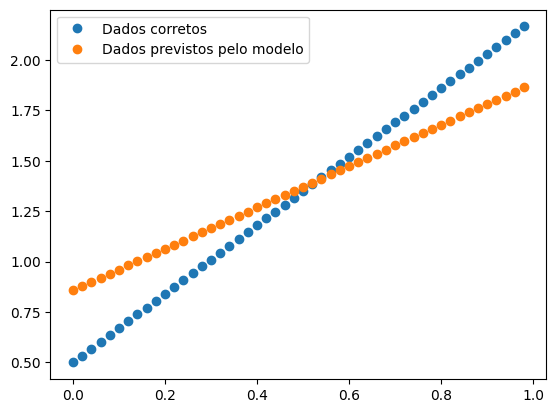

In [5]:
# Imprime os parâmetros atuais do modelo. Agora eles estão bem mais próximos dos parâmetros que definimos na etapa 2.
print(model.state_dict())

with torch.inference_mode():  # Coloca o modelo no modo de inferência
    y_prev = model(x)  # Calcula os valores de y previstos pelo modelo.

plt.plot(x, y, "o", label="Dados corretos")
plt.plot(x, y_prev, "o", label="Dados previstos pelo modelo")
plt.legend()
plt.show()


# 6. E agora?

A previsão da rede neural melhorou bastante após o treinamento. Mas você consegue deixar ela melhor ainda?

Uma forma bem fácil é aumentar o n° de épocas. Em vez de 100 coloque 200, 500, 1000...

Mas outra forma mais interessante é mudando as funções de perda e de otimização:

- Teste alterar os valores do parâmetro "lr" (o passo) da função de otimização. Valores maiores vão ajudar, mas será que valores grandes demais não vão acabar atrapalhando?

- E que tal sair do simples e em vez de utilizar o SGD utilizar outro algoritmo mais complexo como o Adam?
  Dica: Substitua `torch.optim.SGD` por `torch.optim.Adam`. Ou teste outros algoritmos disponíveis na [documentação do PyTorch](https://pytorch.org/docs/stable/optim.html).

<img src="https://miro.medium.com/v2/resize:fit:960/1*okxb3iEckjbqI9dTSztOSg.gif" alt="Animação comparando as funções de otimização" style="display: block; margin: auto"/>
<p style="text-align: center;font-style: italic;">Animação comparando as funções de otimização em chegar ao ponto mínimo global sem ficar preso no ponto de cela</p>

- E a função loss? Veja na [documentação](https://pytorch.org/docs/stable/nn.html#loss-functions) outras funções disponíveis.

Ah, sempre que você executar a etapa 4, execute antes a etapa 3 para instanciar o modelo novamente, se não ele tenta treinar o modelo que já foi treinado, que não é o que queremos.
